In [126]:
import warnings

from collections import Counter

from itertools import product

from tqdm import tqdm

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from umap import UMAP

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

from src.datasets import (
    alldts, get_blobs, get_linear,
    get_breast_cancer_wisconsin, get_breast_cancer_coimbra, get_german_credit
)

## Test

In [ ]:
data, target = get_breast_cancer_wisconsin()
# data, target = get_blobs(n_obs=512)
X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(int(2**13), ), activation="tanh", solver="adam",
    alpha=0, beta_1=0.9, beta_2=0.999,
    max_iter=100,
    verbose=True, shuffle=False,
    early_stopping=False, validation_fraction=0.1,
    n_iter_no_change=256, tol=1e-6,
    epsilon=1e-8, learning_rate="constant",
)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
accuracy_score(y_pred=model.predict(X_train), y_true=y_train), accuracy_score(y_pred=model.predict(X_test), y_true=y_test)

In [ ]:
plt.plot(model.loss_curve_)
plt.yscale("log")
plt.grid(True, "both", alpha=.3)

In [ ]:
print(classification_report(y_pred=model.predict(X_train), y_true=y_train))

In [ ]:
print(classification_report(y_pred=model.predict(X_test), y_true=y_test))

## Execute for all datasets

### solver adam

In [99]:
res = list()

for name, (data, target) in alldts().items():
    X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

    model = MLPClassifier(
        hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
        alpha=0, beta_1=0.9, beta_2=0.999,
        max_iter=1024,
        verbose=False, shuffle=False,
        early_stopping=False, validation_fraction=0.1,
        n_iter_no_change=128, tol=1e-6,
        epsilon=1e-8, learning_rate="constant",
    )

    model.fit(X_train, y_train)

    res.append((
        name,
        accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
        accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
        model.best_loss_
    ))
    print(res[-1])

('synth_linear', 0.972327726532827, 0.9609756097560975, 0.07479060085331873)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('synth_blobs', 0.8648941942485079, 0.8536585365853658, 0.317625693929805)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('synth_moons', 0.9663591969614759, 0.975609756097561, 0.08113484595582693)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('cred_aus', 0.9951690821256038, 0.8840579710144928, 0.013603051970907467)
('cred_ger', 1.0, 0.75, 0.0001647416399917494)
('banknote', 1.0, 1.0, 9.90775449600081e-05)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('breast_coimbra', 1.0, 0.75, 0.0017770310664138344)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('breast_wiscons', 1.0, 0.9130434782608695, 0.002470728167867502)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


('haberman_surv', 0.7672727272727272, 0.7741935483870968, 0.4986803897335225)
('sonar', 1.0, 0.7619047619047619, 0.00023943274137558672)
('heart', 1.0, 0.8148148148148148, 0.0037144178182797905)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1024) reached and the optimization hasn't converged yet.
  warnings.warn(


In [100]:
for elem in res:
    print(elem)

('synth_linear', 0.972327726532827, 0.9609756097560975, 0.07479060085331873)
('synth_blobs', 0.8648941942485079, 0.8536585365853658, 0.317625693929805)
('synth_moons', 0.9663591969614759, 0.975609756097561, 0.08113484595582693)
('cred_aus', 0.9951690821256038, 0.8840579710144928, 0.013603051970907467)
('cred_ger', 1.0, 0.75, 0.0001647416399917494)
('banknote', 1.0, 1.0, 9.90775449600081e-05)
('breast_coimbra', 1.0, 0.75, 0.0017770310664138344)
('breast_wiscons', 1.0, 0.9130434782608695, 0.002470728167867502)
('haberman_surv', 0.7672727272727272, 0.7741935483870968, 0.4986803897335225)
('sonar', 1.0, 0.7619047619047619, 0.00023943274137558672)
('heart', 1.0, 0.8148148148148148, 0.0037144178182797905)


```
('synth_linear', 0.9788388497015735, 0.9707317073170731, 0.052382419507525285)
('synth_blobs', 0.8562126966901791, 0.8634146341463415, 0.3211682111107963)
('synth_moons', 0.9739555073250136, 0.975609756097561, 0.07893427880505421)
('cred_aus', 1.0, 0.8115942028985508, 0.003973575106792552)
('cred_ger', 1.0, 0.73, 0.00016377633931161258)
('banknote', 1.0, 1.0, 9.819143678097311e-05)
('breast_coimbra', 1.0, 0.5833333333333334, 0.0016671655433862797)
('breast_wiscons', 0.998371335504886, 0.9855072463768116, 0.010349796410566922)
('haberman_surv', 0.7927272727272727, 0.7741935483870968, 0.4558088231894344)
('sonar', 1.0, 0.9047619047619048, 0.00025074506213388937)
('heart', 1.0, 0.7777777777777778, 0.0024350693271338307)
```

### solver lbfgs

In [102]:
res = list()

for name, (data, target) in alldts().items():
    X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.1)

    model = MLPClassifier(
        hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="lbfgs",
        alpha=0, beta_1=0.9, beta_2=0.999,
        max_iter=1024,
        verbose=False, shuffle=False,
        early_stopping=False, validation_fraction=0.1,
        n_iter_no_change=128, tol=1e-6,
        epsilon=1e-8, learning_rate="constant",
    )

    model.fit(X_train, y_train)

    res.append((
        name,
        accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
        accuracy_score(y_pred=model.predict(X_test), y_true=y_test)
    ))
    print(res[-1])

('synth_linear', 1.0, 0.9317073170731708)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


('synth_blobs', 0.8811720021703744, 0.8536585365853658)


/home/maia/UFMG/202202-UFMG-RNA/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


('synth_moons', 0.9858925664677157, 0.9560975609756097)
('cred_aus', 1.0, 0.7681159420289855)
('cred_ger', 1.0, 0.76)
('banknote', 1.0, 1.0)
('breast_coimbra', 1.0, 0.8333333333333334)
('breast_wiscons', 1.0, 0.9420289855072463)
('haberman_surv', 0.9818181818181818, 0.6451612903225806)
('sonar', 1.0, 0.8571428571428571)
('heart', 1.0, 0.7407407407407407)


In [103]:
for elem in res:
    print(elem)

('synth_linear', 1.0, 0.9317073170731708)
('synth_blobs', 0.8811720021703744, 0.8536585365853658)
('synth_moons', 0.9858925664677157, 0.9560975609756097)
('cred_aus', 1.0, 0.7681159420289855)
('cred_ger', 1.0, 0.76)
('banknote', 1.0, 1.0)
('breast_coimbra', 1.0, 0.8333333333333334)
('breast_wiscons', 1.0, 0.9420289855072463)
('haberman_surv', 0.9818181818181818, 0.6451612903225806)
('sonar', 1.0, 0.8571428571428571)
('heart', 1.0, 0.7407407407407407)


```
('synth_linear', 1.0, 0.9317073170731708)
('synth_blobs', 0.8811720021703744, 0.8536585365853658)
('synth_moons', 0.9858925664677157, 0.9560975609756097)
('cred_aus', 1.0, 0.7681159420289855)
('cred_ger', 1.0, 0.76)
('banknote', 1.0, 1.0)
('breast_coimbra', 1.0, 0.8333333333333334)
('breast_wiscons', 1.0, 0.9420289855072463)
('haberman_surv', 0.9818181818181818, 0.6451612903225806)
('sonar', 1.0, 0.8571428571428571)
('heart', 1.0, 0.7407407407407407)
```

## Execute for specific datasets

### Coimbra

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_breast_cancer_coimbra()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

In [ ]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

### German Credit

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _ in tqdm(range(30)):
        data, target = get_german_credit()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=0, beta_1=0.9, beta_2=0.999,
            max_iter=2048,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=128, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append((
            accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            model.best_loss_
        ))

In [ ]:
pd.DataFrame(res)[1].plot.hist(bins=np.linspace(0, 1, 21), figsize=(5, 2))

## Define performance metrics

In [187]:
from sklearn.metrics import (
    silhouette_samples, silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)
def sil_neg_samples_score(X, labels):
    res = silhouette_samples(X, labels)

    counts = Counter(res > 0)
    return counts[False] / (counts[False] + counts[True])
    
def cluster_evaluate(X, labels):
    metrics = [
        silhouette_score,
        sil_neg_samples_score,
        calinski_harabasz_score,
        davies_bouldin_score,
    ]

    return {
        metric.__name__: metric(X=X, labels=labels)
        for metric in metrics
    }

## Evaluate network weights

In [177]:
repeat = 10
alphas = [0] + list(np.logspace(-1, 1/2, num=20))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    res = list()

    for _, alpha in tqdm(list(product(range(repeat), alphas))):
        data, target = get_german_credit()
        X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, stratify=target, test_size=.3)

        model = MLPClassifier(
            hidden_layer_sizes=(int(2**10), ), activation="tanh", solver="adam",
            alpha=alpha, beta_1=0.9, beta_2=0.999,
            max_iter=1024,
            verbose=False, shuffle=False,
            early_stopping=False, validation_fraction=0.1,
            n_iter_no_change=512, tol=1e-6,
            epsilon=1e-8, learning_rate="constant",
        )

        model.fit(X_train, y_train)

        res.append(dict({
            "alpha": alpha,
            "acc_train": accuracy_score(y_pred=model.predict(X_train), y_true=y_train),
            "acc_test": accuracy_score(y_pred=model.predict(X_test), y_true=y_test),
            "best_loss": model.best_loss_,
            "iterations": model.n_iter_
        }, **cluster_evaluate(X=np.tanh(X_train @ model.coefs_[0]), labels=y_train)))

100%|██████████| 40/40 [23:38<00:00, 35.47s/it]


In [178]:
df_res = pd.json_normalize(res)

In [179]:
df_res_grouped = df_res.groupby("alpha", as_index=False).mean()
df_res_grouped

,alpha,acc_train,acc_test,best_loss,iterations,silhouette_score,silhouette_neg_samples,calinski_harabasz_score,davies_bouldin_score
0,0.0,1.000000,0.748667,0.000187,1024.0,0.018093,0.296286,7.019071,9.143940
1,0.1,1.000000,0.745333,0.050220,1024.0,0.017465,0.312429,7.239920,8.976903
2,1.0,0.993571,0.742667,0.252085,1024.0,0.025067,0.296857,11.367781,7.102194
3,2.0,0.831286,0.735000,0.432569,960.6,0.132953,0.256286,109.276212,2.488250


In [180]:
df_res_grouped.corrwith(df_res_grouped["acc_test"])

alpha                     -0.973103
acc_train                  0.918900
acc_test                   1.000000
best_loss                 -0.971247
iterations                 0.906738
silhouette_score          -0.925336
silhouette_neg_samples     0.849011
calinski_harabasz_score   -0.920353
davies_bouldin_score       0.975014
dtype: float64

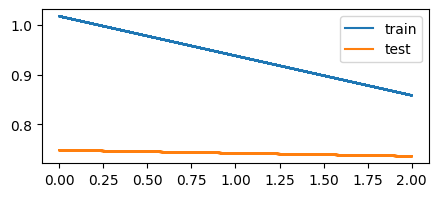

In [181]:
plt.figure(figsize=(5, 2))
ax = plt.gca()

x = df_res["alpha"]
poly_train = np.poly1d(np.polyfit(df_res["alpha"], df_res["acc_train"], 1))
poly_test = np.poly1d(np.polyfit(df_res["alpha"], df_res["acc_test"], 1))

plt.plot(x, poly_train(x), label="train")
plt.plot(x, poly_test(x), label="test")
plt.legend()
plt.show()
plt.close()

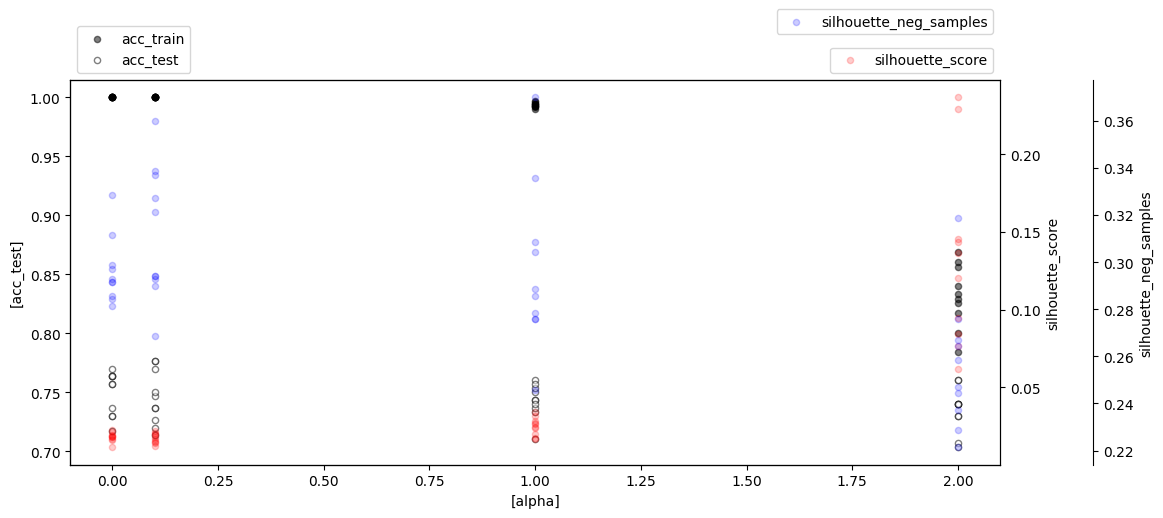

In [183]:
plt.figure(figsize=(12, 5))
ax = plt.gca()

(
    df_res
    [["alpha", "acc_train"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_train"],
        c="black", edgecolors="black", alpha=.5,
        ax=ax, label="acc_train",
    )
)

(
    df_res
    [["alpha", "acc_test"]]
    .plot.scatter(
        x=["alpha"],
        y=["acc_test"],
        c="white", edgecolors="black", alpha=.5,
        ax=ax, label="acc_test",
    )
)

axt = ax.twinx()

(
    df_res
    [["alpha", "silhouette_score"]]
    .plot.scatter(
        x="alpha",
        y="silhouette_score",
        c="red", alpha=.2,
        ax=axt, label="silhouette_score"
    )
)

axt2 = ax.twinx()

(
    df_res
    [["alpha", "silhouette_neg_samples"]]
    .plot.scatter(
        x="alpha",
        y="silhouette_neg_samples",
        c="blue", alpha=.2,
        ax=axt2, label="silhouette_neg_samples"
    )
)

ax.legend(bbox_to_anchor=(0, 1), loc="lower left")
axt.legend(bbox_to_anchor=(1, 1), loc="lower right")
axt2.legend(bbox_to_anchor=(1, 1.1), loc="lower right")
axt2.spines.right.set_position(("axes", 1.1))

---